In [1]:
# Import Python libraries for visualisation and data analysis
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# sns.set_theme()  # Apply the default Seaborn theme
%matplotlib inline

# Suppress warnings to avoid potential confusion
import warnings

# Libraries for statistical and scientific computing
import statsmodels.api as sm
from scipy import stats

warnings.filterwarnings("ignore")
import ipywidgets as widgets
from IPython.display import display

In [2]:
d1=pd.read_csv('2020.csv')  
# d1.set_index('date',inplace=True)
d2=pd.read_csv('2021.csv')  
# d2.set_index('date',inplace=True)
d3=pd.read_csv('2022.csv')  

# d3.set_index('date',inplace=True)

In [86]:
def subperiod_mobility_trends(data, start_date, end_date):
    """
    Add your mobility data in `data`.

    This function selects a subperiod of the mobility data based on prespecified start data and end date.
    """
    subdata= data[
        data["date"].isin(pd.date_range(start=start_date, end=end_date))
    ]
    return subdata


def rename_mobility_trends(data):
    """
    This function renames the column headings of the six mobility categories.
    """
    data = data.rename(
        columns={
            "retail_and_recreation_percent_change_from_baseline": "Retail_Recreation",
            "grocery_and_pharmacy_percent_change_from_baseline": "Grocery_Pharmacy",
            "parks_percent_change_from_baseline": "Parks",
            "transit_stations_percent_change_from_baseline": "Transit_stations",
            "workplaces_percent_change_from_baseline": "Workplaces",
            "residential_percent_change_from_baseline": "Residential",
        }
    )
    return data

In [87]:
d1=rename_mobility_trends(d1)
d2=rename_mobility_trends(d2)
d3=rename_mobility_trends(d3)

In [88]:
d1['year']='2020'
d2['year']='2021'
d3['year']='2022'

In [89]:
data=d1.append(d2)
data=data.append(d3)

In [90]:
ALL = 'ALL'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

In [91]:
london_data=data.loc[data['sub_region_1'] == 'Greater London']
greater=london_data[london_data['sub_region_2'].isnull()]
london_regions=london_data.sub_region_2.unique()
london_regions=london_regions[1:]
variabl=["Retail_Recreation","Grocery_Pharmacy","Parks","Transit_stations","Workplaces","Residential"]

In [92]:
data_long = pd.melt(
    london_data,
    id_vars=["country_region", "sub_region_1","sub_region_2", "date"],
    # The columns 'date' and 'sub_region_1' are not needed for the box
    # plots below but we will need the two variables in subsequent tasks.
    value_vars=data.columns[9:15],
).dropna()


In [93]:
def ld(data_long):
    first_lockdown_UK = data_long[
        (data_long["country_region"] == "United Kingdom")
        & (data_long["date"] >= "2020-03-24")
        & (data_long["date"] <= "2020-04-13")
    ]

    second_lockdown_UK = data_long[
        (data_long["country_region"] == "United Kingdom")
        & (data_long["date"] >= "2020-11-05")
        & (data_long["date"] <= "2020-11-25")
    ]

    third_lockdown_UK = data_long[
        (data_long["country_region"] == "United Kingdom")
        & (data_long["date"] >= "2021-01-06")
        & (data_long["date"] <= "2021-01-26")
    ]
    return [first_lockdown_UK,second_lockdown_UK,third_lockdown_UK]

In [94]:
first_lockdown_UK,second_lockdown_UK,third_lockdown_UK=ld(data_long)
lockdowns_dataframes = [first_lockdown_UK, second_lockdown_UK, third_lockdown_UK]
three_lockdowns_UK = pd.concat(
    lockdowns_dataframes,
    keys=["first_lockdown_UK", "second_lockdown_UK", "third_lockdown_UK"],
).reset_index()


# third lockdown

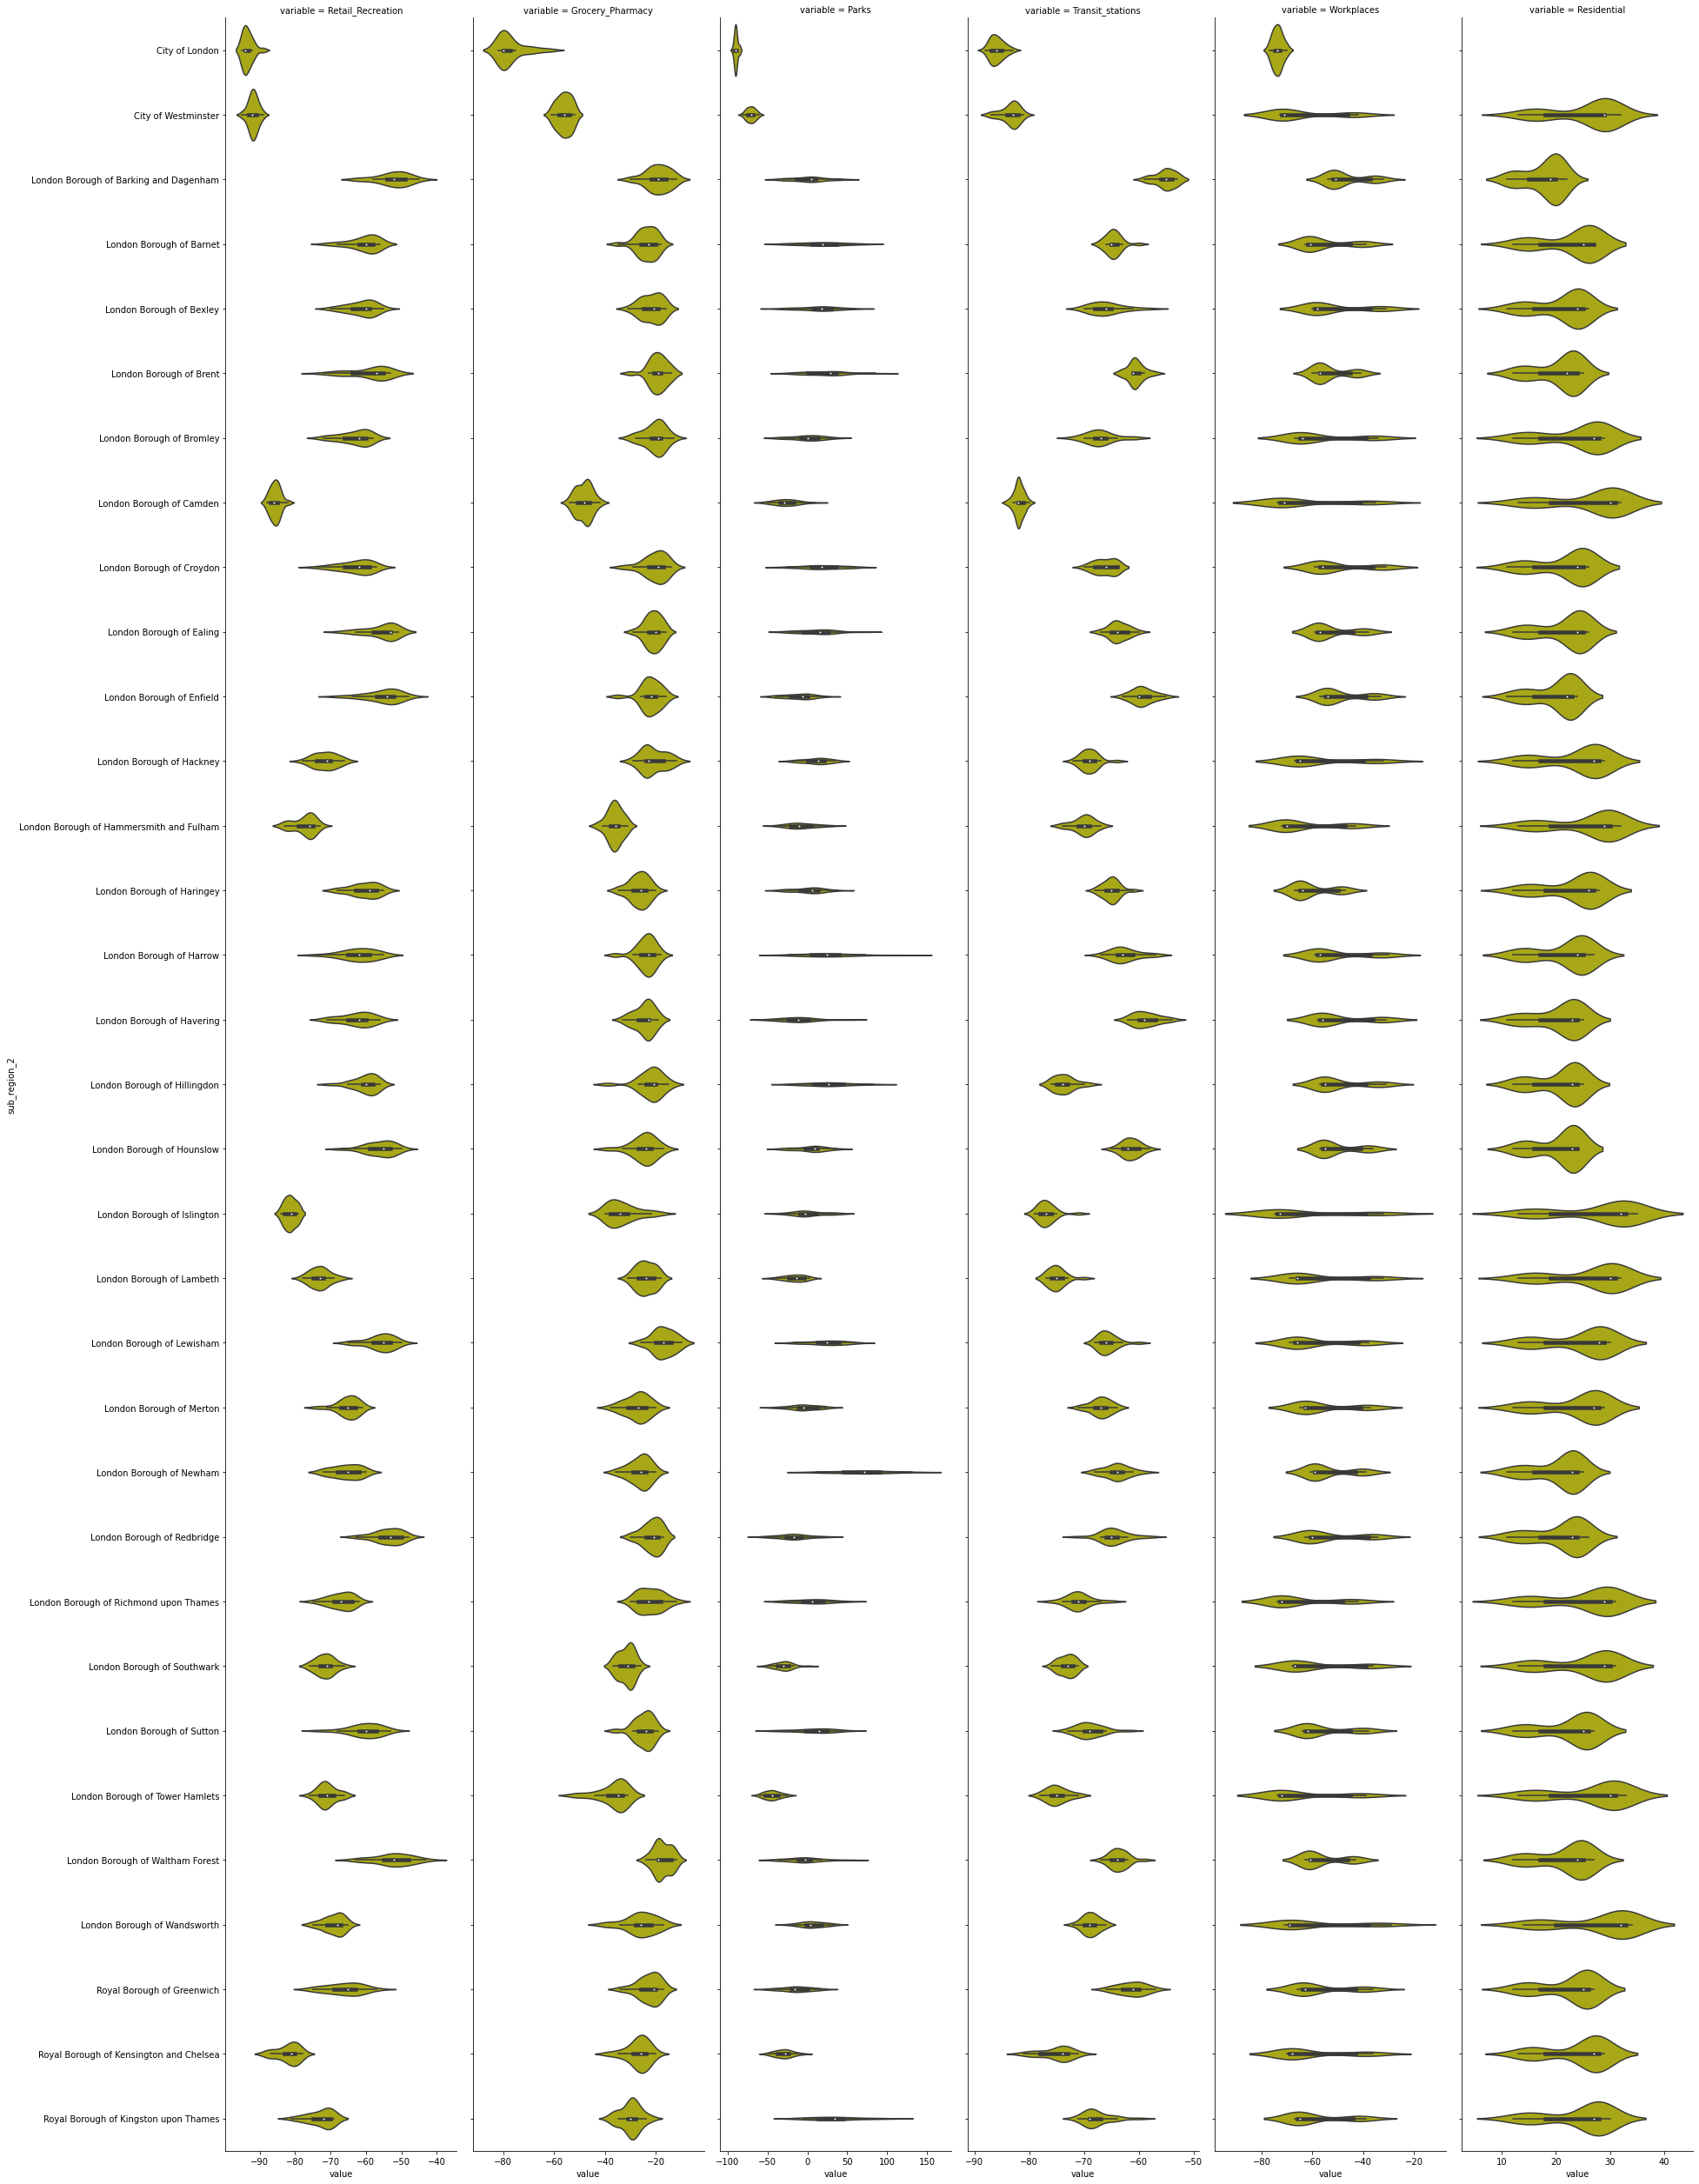

In [38]:
sns.catplot(
    x="value",
    y="sub_region_2",
    col="variable",
    kind="violin",
    sharex=False,
    height=35,
    aspect=0.13,
    color="y",
    data=third_lockdown_UK,
);

In [12]:
third_lockdown_UK_mean = (
    third_lockdown_UK.groupby(["variable", "sub_region_2"])["value"]
    .mean()
    .reset_index()
)



In [14]:

third_lockdown_UK_mean_sorted = third_lockdown_UK_mean.sort_values(
    by=[
        "variable",
        "value",
    ],
    ascending=False,
)[["sub_region_2", "variable", "value"]]
third_lockdown_UK_mean_sorted

,sub_region_2,variable,value
166,London Borough of Barking and Dagenham,Workplaces,-46.904762
174,London Borough of Enfield,Workplaces,-48.952381
180,London Borough of Hillingdon,Workplaces,-49.238095
179,London Borough of Havering,Workplaces,-49.523810
172,London Borough of Croydon,Workplaces,-49.904762
...,...,...,...
12,London Borough of Hammersmith and Fulham,Grocery_Pharmacy,-36.238095
27,London Borough of Tower Hamlets,Grocery_Pharmacy,-36.809524
7,London Borough of Camden,Grocery_Pharmacy,-48.285714
1,City of Westminster,Grocery_Pharmacy,-56.095238


In [17]:
variabl=["Retail_Recreation","Grocery_Pharmacy","Parks","Transit_stations","Workplaces","Residential"]

In [18]:
for i in variabl:
    t_min=third_lockdown_UK_mean_sorted[third_lockdown_UK_mean_sorted['variable']==i].iloc[0]
    t_max=third_lockdown_UK_mean_sorted[third_lockdown_UK_mean_sorted['variable']==i].iloc[-1]
    
    print(f'min change is for {i} is {t_min.sub_region_2} with value of {t_min.value}')
    print(f'max change is for {i} is {t_max.sub_region_2} with value of {t_max.value}')
    print('\n')

min change is for Retail_Recreation is London Borough of Barking and Dagenham with value of -52.333333333333336
max change is for Retail_Recreation is City of London with value of -93.38095238095238


min change is for Grocery_Pharmacy is London Borough of Lewisham with value of -17.142857142857142
max change is for Grocery_Pharmacy is City of London with value of -77.19047619047619


min change is for Parks is London Borough of Newham with value of 69.42857142857143
max change is for Parks is City of London with value of -89.76190476190476


min change is for Transit_stations is London Borough of Barking and Dagenham with value of -55.19047619047619
max change is for Transit_stations is City of London with value of -85.9047619047619


min change is for Workplaces is London Borough of Barking and Dagenham with value of -46.904761904761905
max change is for Workplaces is City of London with value of -73.8


min change is for Residential is London Borough of Wandsworth with value of 27.8

In [19]:
third_lockdown_UK_descriptive_stats = (
    third_lockdown_UK.groupby(["sub_region_2", "variable"])["value"]
    .agg([min, max, np.mean, np.median, np.std])
    .reset_index()
)
third_lockdown_UK_descriptive_stats

,sub_region_2,variable,min,max,mean,median,std
0,City of London,Grocery_Pharmacy,-82.0,-62.0,-77.190476,-80.0,5.306779
1,City of London,Parks,-94.0,-85.0,-89.761905,-90.0,2.211442
2,City of London,Retail_Recreation,-95.0,-89.0,-93.380952,-94.0,1.532194
3,City of London,Transit_stations,-88.0,-83.0,-85.904762,-86.0,1.261141
4,City of London,Workplaces,-77.0,-70.0,-73.800000,-74.0,1.934647
...,...,...,...,...,...,...,...
192,Royal Borough of Kingston upon Thames,Parks,-5.0,95.0,34.916667,34.5,30.696338
193,Royal Borough of Kingston upon Thames,Residential,12.0,30.0,24.238095,27.0,6.032452
194,Royal Borough of Kingston upon Thames,Retail_Recreation,-81.0,-69.0,-72.857143,-72.0,3.539572
195,Royal Borough of Kingston upon Thames,Transit_stations,-71.0,-60.0,-67.619048,-69.0,2.635834


# Second Lockdown

In [24]:
second_lockdown_UK_mean = (
    second_lockdown_UK.groupby(["variable", "sub_region_2"])["value"]
    .mean()
    .reset_index()
)

second_lockdown_UK_mean_sorted = second_lockdown_UK_mean.sort_values(
    by=[
        "variable",
        "value",
    ],
    ascending=False,
)[["sub_region_2", "variable", "value"]]


,sub_region_2,variable,value
166,London Borough of Barking and Dagenham,Workplaces,-33.857143
174,London Borough of Enfield,Workplaces,-37.285714
180,London Borough of Hillingdon,Workplaces,-37.523810
178,London Borough of Harrow,Workplaces,-37.714286
172,London Borough of Croydon,Workplaces,-37.904762
...,...,...,...
27,London Borough of Tower Hamlets,Grocery_Pharmacy,-23.761905
12,London Borough of Hammersmith and Fulham,Grocery_Pharmacy,-27.095238
7,London Borough of Camden,Grocery_Pharmacy,-37.523810
1,City of Westminster,Grocery_Pharmacy,-46.761905


In [25]:
for i in variabl:
    t_min=second_lockdown_UK_mean_sorted[second_lockdown_UK_mean_sorted['variable']==i].iloc[0]
    t_max=second_lockdown_UK_mean_sorted[second_lockdown_UK_mean_sorted['variable']==i].iloc[-1]
    
    print(f'min change is for {i} is {t_min.sub_region_2} with value of {t_min.value}')
    print(f'max change is for {i} is {t_max.sub_region_2} with value of {t_max.value}')
    print('\n')

min change is for Retail_Recreation is London Borough of Barking and Dagenham with value of -38.857142857142854
max change is for Retail_Recreation is City of London with value of -89.80952380952381


min change is for Grocery_Pharmacy is London Borough of Lewisham with value of -3.9523809523809526
max change is for Grocery_Pharmacy is City of London with value of -70.23809523809524


min change is for Parks is London Borough of Newham with value of 117.0952380952381
max change is for Parks is City of London with value of -84.80952380952381


min change is for Transit_stations is London Borough of Barking and Dagenham with value of -37.57142857142857
max change is for Transit_stations is City of London with value of -78.80952380952381


min change is for Workplaces is London Borough of Barking and Dagenham with value of -33.857142857142854
max change is for Workplaces is City of London with value of -66.13333333333334


min change is for Residential is London Borough of Islington with 

In [26]:
second_lockdown_UK_descriptive_stats = (
    second_lockdown_UK.groupby(["sub_region_2", "variable"])["value"]
    .agg([min, max, np.mean, np.median, np.std])
    .reset_index()
)
second_lockdown_UK_descriptive_stats

,sub_region_2,variable,min,max,mean,median,std
0,City of London,Grocery_Pharmacy,-75.0,-56.0,-70.238095,-72.0,5.347006
1,City of London,Parks,-89.0,-74.0,-84.809524,-85.0,3.444112
2,City of London,Retail_Recreation,-92.0,-85.0,-89.809524,-90.0,2.015417
3,City of London,Transit_stations,-81.0,-71.0,-78.809524,-80.0,2.522282
4,City of London,Workplaces,-69.0,-64.0,-66.133333,-66.0,1.302013
...,...,...,...,...,...,...,...
192,Royal Borough of Kingston upon Thames,Parks,-10.0,93.0,54.428571,55.0,33.069912
193,Royal Borough of Kingston upon Thames,Residential,11.0,23.0,19.523810,21.0,4.020187
194,Royal Borough of Kingston upon Thames,Retail_Recreation,-74.0,-57.0,-63.476190,-62.0,4.578417
195,Royal Borough of Kingston upon Thames,Transit_stations,-60.0,-44.0,-51.714286,-52.0,3.689754


# first lockdown

In [27]:
first_lockdown_UK_mean = (
    first_lockdown_UK.groupby(["variable", "sub_region_2"])["value"]
    .mean()
    .reset_index()
)

first_lockdown_UK_mean_sorted = first_lockdown_UK_mean.sort_values(
    by=[
        "variable",
        "value",
    ],
    ascending=False,
)[["sub_region_2", "variable", "value"]]

In [28]:
for i in variabl:
    t_min=first_lockdown_UK_mean_sorted[first_lockdown_UK_mean_sorted['variable']==i].iloc[0]
    t_max=first_lockdown_UK_mean_sorted[first_lockdown_UK_mean_sorted['variable']==i].iloc[-1]
    
    print(f'min change is for {i} is {t_min.sub_region_2} with value of {t_min.value}')
    print(f'max change is for {i} is {t_max.sub_region_2} with value of {t_max.value}')
    print('\n')

min change is for Retail_Recreation is London Borough of Waltham Forest with value of -66.61904761904762
max change is for Retail_Recreation is City of London with value of -96.0


min change is for Grocery_Pharmacy is London Borough of Lewisham with value of -26.19047619047619
max change is for Grocery_Pharmacy is City of London with value of -81.9047619047619


min change is for Parks is London Borough of Croydon with value of 40.142857142857146
max change is for Parks is City of London with value of -90.9047619047619


min change is for Transit_stations is London Borough of Barking and Dagenham with value of -61.904761904761905
max change is for Transit_stations is City of London with value of -92.33333333333333


min change is for Workplaces is London Borough of Barking and Dagenham with value of -65.04761904761905
max change is for Workplaces is City of London with value of -84.42857142857143


min change is for Residential is London Borough of Hammersmith and Fulham with value of

In [29]:
first_lockdown_UK_descriptive_stats = (
    first_lockdown_UK.groupby(["sub_region_2", "variable"])["value"]
    .agg([min, max, np.mean, np.median, np.std])
    .reset_index()
)
first_lockdown_UK_descriptive_stats

,sub_region_2,variable,min,max,mean,median,std
0,City of London,Grocery_Pharmacy,-91.0,-72.0,-81.904762,-83.0,4.773937
1,City of London,Parks,-96.0,-87.0,-90.904762,-91.0,2.188716
2,City of London,Retail_Recreation,-99.0,-93.0,-96.000000,-96.0,1.378405
3,City of London,Transit_stations,-97.0,-87.0,-92.333333,-93.0,2.033060
4,City of London,Workplaces,-89.0,-80.0,-84.428571,-85.0,2.563480
...,...,...,...,...,...,...,...
192,Royal Borough of Kingston upon Thames,Parks,-38.0,41.0,13.687500,18.0,23.508066
193,Royal Borough of Kingston upon Thames,Residential,22.0,37.0,32.222222,34.0,4.917622
194,Royal Borough of Kingston upon Thames,Retail_Recreation,-91.0,-77.0,-82.619048,-81.0,3.667100
195,Royal Borough of Kingston upon Thames,Transit_stations,-84.0,-71.0,-77.476190,-78.0,3.010300


# corelation

In [30]:
UK_mean = london_data.groupby("sub_region_2")[
    [
        "Retail_Recreation",
        "Grocery_Pharmacy",
        "Parks",
        "Transit_stations",
        "Workplaces",
        "Residential",
    ]
].mean()

# Check the data in the DataFrame of mean mobility change we computed
UK_mean

,Retail_Recreation,Grocery_Pharmacy,Parks,Transit_stations,Workplaces,Residential
sub_region_2,,,,,,
City of London,-71.259259,-58.294723,-65.460746,-63.177522,-57.272727,NaN
City of Westminster,-61.560664,-31.286079,-35.431673,-56.229885,-48.742308,15.155642
London Borough of Barking and Dagenham,-23.893997,-5.338442,54.286280,-34.256705,-36.652618,9.883780
London Borough of Barnet,-29.389527,-7.459770,50.473615,-41.559387,-40.756066,13.574713
London Borough of Bexley,-31.983397,-4.544061,36.230871,-43.371648,-37.819923,12.522350
London Borough of Brent,-27.117497,-4.019157,67.255937,-38.916986,-38.439336,11.710089
London Borough of Bromley,-29.655172,-3.939974,24.294889,-44.297573,-41.135377,14.484036
London Borough of Camden,-59.791826,-30.435504,4.310567,-52.535121,-47.696154,15.965296
London Borough of Croydon,-30.715198,-3.641124,43.848285,-44.825032,-36.247765,12.871009


# city of Westminster

In [64]:
col=data[data['sub_region_2']=='City of Westminster']
UK_NADrop_col= col.dropna(
    subset=[
        "country_region",
        "sub_region_1",
        "date",
        "Retail_Recreation",
        "Grocery_Pharmacy",
        "Parks",
        "Transit_stations",
        "Workplaces",
        "Residential",
    ]
)

# Number of rows and columns in the DataFrame without NaNs
UK_NADrop_col.shape

(768, 15)

In [47]:
mobility_trends_UK_corr = col.iloc[:, 9:15].corr()
mobility_trends_UK_corr

,Retail_Recreation,Grocery_Pharmacy,Parks,Transit_stations,Workplaces,Residential
Retail_Recreation,1.000000,0.917150,0.706955,0.969522,0.725736,-0.794691
Grocery_Pharmacy,0.917150,1.000000,0.764265,0.935028,0.697965,-0.792296
Parks,0.706955,0.764265,1.000000,0.675479,0.389129,-0.587968
Transit_stations,0.969522,0.935028,0.675479,1.000000,0.788607,-0.834631
Workplaces,0.725736,0.697965,0.389129,0.788607,1.000000,-0.922796
Residential,-0.794691,-0.792296,-0.587968,-0.834631,-0.922796,1.000000


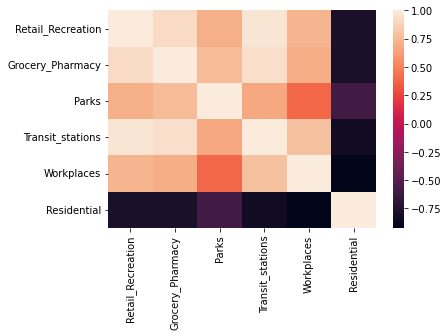

In [48]:
sns.heatmap(mobility_trends_UK_corr);

# tower hamlets correlation 

In [49]:
tower=data[data['sub_region_2']=='London Borough of Tower Hamlets']

In [50]:
mobility_trends_UK_corr = tower.iloc[:, 9:15].corr()
mobility_trends_UK_corr

,Retail_Recreation,Grocery_Pharmacy,Parks,Transit_stations,Workplaces,Residential
Retail_Recreation,1.000000,0.730188,0.430977,0.892447,0.738090,-0.839647
Grocery_Pharmacy,0.730188,1.000000,0.559293,0.684907,0.343768,-0.491185
Parks,0.430977,0.559293,1.000000,0.484571,0.206967,-0.407533
Transit_stations,0.892447,0.684907,0.484571,1.000000,0.831061,-0.871011
Workplaces,0.738090,0.343768,0.206967,0.831061,1.000000,-0.926903
Residential,-0.839647,-0.491185,-0.407533,-0.871011,-0.926903,1.000000


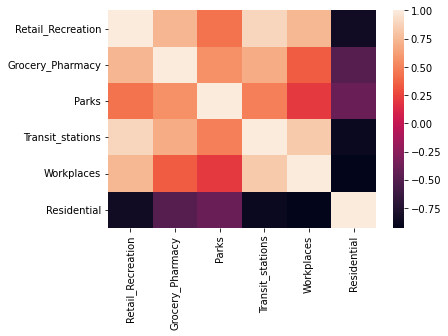

In [51]:
sns.heatmap(mobility_trends_UK_corr);

# Tower hamlets lockdown 

In [34]:
bourgh=data_long.sub_region_2.unique()

In [35]:
tower=data_long[data_long["sub_region_2"] == "London Borough of Tower Hamlets"]
first_lockdown_UK,second_lockdown_UK,third_lockdown_UK=ld(tower)

In [36]:
lockdowns_dataframes = [first_lockdown_UK, second_lockdown_UK, third_lockdown_UK]
three_lockdowns_UK = pd.concat(
    lockdowns_dataframes,
    keys=["first_lockdown_UK", "second_lockdown_UK", "third_lockdown_UK"],
).reset_index()



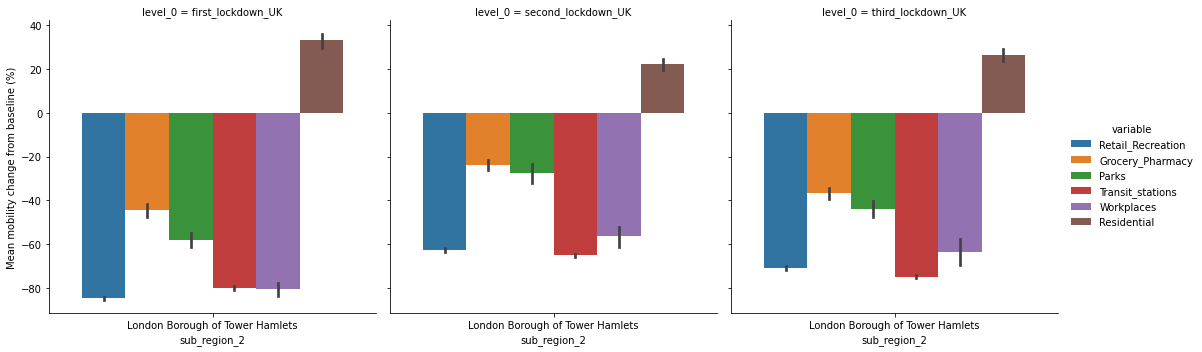

In [37]:
# Display the three lockdowns as a catplot multi-plot
grid = sns.catplot(
    kind="bar",
    x="sub_region_2",
    y="value",
    hue="variable",
    col="level_0",
    data=three_lockdowns_UK,
)
grid.set_ylabels("Mean mobility change from baseline (%)")

# tower hamlets regression

In [59]:
UK_NADrop_tower= tower.dropna(
    subset=[
        "country_region",
        "sub_region_1",
        "date",
        "Retail_Recreation",
        "Grocery_Pharmacy",
        "Parks",
        "Transit_stations",
        "Workplaces",
        "Residential",
    ]
)

# Number of rows and columns in the DataFrame without NaNs
UK_NADrop_tower.shape

(783, 15)

In [60]:
for i in range(len(variabl)):
    for j in range(i+1,len(variabl)):
        print(f'for {variabl[i]} and {variabl[j]} linear regression val is')
        model_outputs = stats.linregress(
        UK_NADrop_tower[variabl[i]], UK_NADrop_tower[variabl[j]])
        print(model_outputs)
        print('\n')

for Retail_Recreation and Grocery_Pharmacy linear regression val is
LinregressResult(slope=0.4913752304796176, intercept=7.978625147980988, rvalue=0.7301884264302877, pvalue=2.489914731174765e-131, stderr=0.016452419982281415, intercept_stderr=0.8504464571029303)


for Retail_Recreation and Parks linear regression val is
LinregressResult(slope=0.5108280550466056, intercept=10.449432372818583, rvalue=0.4309774138359571, pvalue=9.360402205387711e-37, stderr=0.03827153271677052, intercept_stderr=1.9783040696705485)


for Retail_Recreation and Transit_stations linear regression val is
LinregressResult(slope=0.6863180602597102, intercept=-20.453438901701496, rvalue=0.8924467505711825, pvalue=3.4000461506203783e-272, stderr=0.012414842089434682, intercept_stderr=0.6417389345654179)


for Retail_Recreation and Workplaces linear regression val is
LinregressResult(slope=0.7964393940704284, intercept=-10.31950539265059, rvalue=0.7380902766664937, pvalue=1.3284859833233748e-135, stderr=0.02605131

In [61]:
for i in range(len(variabl)):
    for j in range(i+1,len(variabl)):
        print(f'for {variabl[i]} and {variabl[j]} linear regression val is')
        X = sm.add_constant(UK_NADrop_tower[variabl[i]])
        Y = UK_NADrop_tower[variabl[j]]
        model = sm.OLS(Y, X)
        results = model.fit()

        print_model = results.summary()
        print(print_model)
        print('\n')

for Retail_Recreation and Grocery_Pharmacy linear regression val is
                            OLS Regression Results                            
Dep. Variable:       Grocery_Pharmacy   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     892.0
Date:                Fri, 30 Sep 2022   Prob (F-statistic):          2.49e-131
Time:                        06:16:33   Log-Likelihood:                -2901.6
No. Observations:                 783   AIC:                             5807.
Df Residuals:                     781   BIC:                             5816.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

# Tower hamlet regression against Southwark

In [79]:
tower=data[data['sub_region_2']=='London Borough of Tower Hamlets']
UK_NADrop_tower= tower.dropna(
    subset=[
        "country_region",
        "sub_region_1",
        "date",
        "Retail_Recreation",
        "Grocery_Pharmacy",
        "Parks",
        "Transit_stations",
        "Workplaces",
        "Residential",
    ]
)
UK_NADrop_tower.set_index('date',inplace=True)
# Number of rows and columns in the DataFrame without NaNs
UK_NADrop_tower.shape

(783, 14)

In [80]:
Southwark=data[data['sub_region_2']=='London Borough of Southwark']
UK_NADrop_Southwark= Southwark.dropna(
    subset=[
        "country_region",
        "sub_region_1",
        "date",
        "Retail_Recreation",
        "Grocery_Pharmacy",
        "Parks",
        "Transit_stations",
        "Workplaces",
        "Residential",
    ]
)
UK_NADrop_Southwark.set_index('date',inplace=True)
# Number of rows and columns in the DataFrame without NaNs
UK_NADrop_Southwark.shape

(783, 14)

In [81]:
for i in range(len(variabl)):
    print(f'for {variabl[i]} linear regression val is')
    X = sm.add_constant(UK_NADrop_tower[variabl[i]])
    Y = UK_NADrop_Southwark[variabl[i]]
    model = sm.OLS(Y, X)
    results = model.fit()

    print_model = results.summary()
    print(print_model)
    print('\n')

for Retail_Recreation linear regression val is
                            OLS Regression Results                            
Dep. Variable:      Retail_Recreation   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     7785.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        06:30:47   Log-Likelihood:                -2535.7
No. Observations:                 783   AIC:                             5075.
Df Residuals:                     781   BIC:                             5085.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [97]:
#after lockdown improvements

In [101]:
def ld(data_long):
    first_lockdown_UK = data_long[
        (data_long["country_region"] == "United Kingdom")
        & (data_long["date"] >= "2020-04-13")
        & (data_long["date"] <= "2020-11-05")
    ]

    second_lockdown_UK = data_long[
        (data_long["country_region"] == "United Kingdom")
        & (data_long["date"] >= "2020-11-25")
        & (data_long["date"] <= "2021-01-06")
    ]

    third_lockdown_UK = data_long[
        (data_long["country_region"] == "United Kingdom")
        & (data_long["date"] >= "2021-01-26")

    ]
    return [first_lockdown_UK,second_lockdown_UK,third_lockdown_UK]

In [102]:
first_lockdown_UK,second_lockdown_UK,third_lockdown_UK=ld(data_long)
lockdowns_dataframes = [first_lockdown_UK, second_lockdown_UK, third_lockdown_UK]
three_lockdowns_UK = pd.concat(
    lockdowns_dataframes,
    keys=["first_lockdown_UK", "second_lockdown_UK", "third_lockdown_UK"],
).reset_index()


In [103]:
third_lockdown_UK_mean = (
    third_lockdown_UK.groupby(["variable", "sub_region_2"])["value"]
    .mean()
    .reset_index()
)



In [104]:
third_lockdown_UK_mean_sorted = third_lockdown_UK_mean.sort_values(
    by=[
        "variable",
        "value",
    ],
    ascending=False,
)[["sub_region_2", "variable", "value"]]
third_lockdown_UK_mean_sorted

,sub_region_2,variable,value
178,London Borough of Harrow,Workplaces,-25.940503
181,London Borough of Hounslow,Workplaces,-30.592677
179,London Borough of Havering,Workplaces,-30.807780
186,London Borough of Newham,Workplaces,-31.354691
172,London Borough of Croydon,Workplaces,-32.185355
...,...,...,...
12,London Borough of Hammersmith and Fulham,Grocery_Pharmacy,-14.139588
18,London Borough of Islington,Grocery_Pharmacy,-16.615561
1,City of Westminster,Grocery_Pharmacy,-21.757437
7,London Borough of Camden,Grocery_Pharmacy,-23.745995


In [105]:
for i in variabl:
    t_min=third_lockdown_UK_mean_sorted[third_lockdown_UK_mean_sorted['variable']==i].iloc[0]
    t_max=third_lockdown_UK_mean_sorted[third_lockdown_UK_mean_sorted['variable']==i].iloc[-1]
    
    print(f'min change is for {i} is {t_min.sub_region_2} with value of {t_min.value}')
    print(f'max change is for {i} is {t_max.sub_region_2} with value of {t_max.value}')
    print('\n')

min change is for Retail_Recreation is London Borough of Waltham Forest with value of -11.219679633867276
max change is for Retail_Recreation is City of London with value of -65.12356979405034


min change is for Grocery_Pharmacy is London Borough of Harrow with value of 5.780320366132723
max change is for Grocery_Pharmacy is City of London with value of -54.526315789473685


min change is for Parks is London Borough of Newham with value of 176.9862385321101
max change is for Parks is City of London with value of -61.5766590389016


min change is for Transit_stations is Royal Borough of Greenwich with value of -30.787185354691076
max change is for Transit_stations is London Borough of Islington with value of -66.76201372997711


min change is for Workplaces is London Borough of Harrow with value of -25.94050343249428
max change is for Workplaces is City of London with value of -51.626198083067095


min change is for Residential is London Borough of Islington with value of 13.9336384439

In [106]:
tower=data_long[data_long["sub_region_2"] == "London Borough of Tower Hamlets"]
first_lockdown_UK,second_lockdown_UK,third_lockdown_UK=ld(tower)

In [107]:
lockdowns_dataframes = [first_lockdown_UK, second_lockdown_UK, third_lockdown_UK]
three_lockdowns_UK = pd.concat(
    lockdowns_dataframes,
    keys=["first_lockdown_UK", "second_lockdown_UK", "third_lockdown_UK"],
).reset_index()



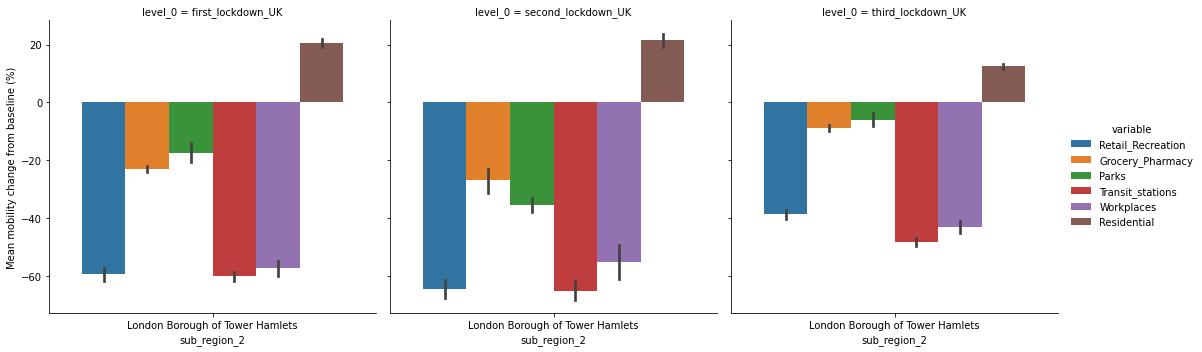

In [108]:
# Display the three lockdowns as a catplot multi-plot
grid = sns.catplot(
    kind="bar",
    x="sub_region_2",
    y="value",
    hue="variable",
    col="level_0",
    data=three_lockdowns_UK,
)
grid.set_ylabels("Mean mobility change from baseline (%)")